In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
df_State=pd.read_csv('StatewiseTestingDetails.csv')

In [2]:
df_Karnataka=df_State.loc[df_State['State'] == 'Karnataka']    #we are restricting ourselves only to the state of Karnataka
df_Karnataka = df_Karnataka.sort_values(by="Date")             #sorting the values based on date and only taking the date and positive columns
df_Karnataka = df_Karnataka[['Date', 'Positive']]
df_Karnataka=df_Karnataka.dropna()
df_Karnataka['Positive']=df_Karnataka['Positive'].astype('Int64',errors='ignore')

In [3]:
df_Karnataka.head()

,Date,Positive
2259,2020-04-03,128
2260,2020-04-07,175
2261,2020-04-08,181
2262,2020-04-09,197
2263,2020-04-10,207


<AxesSubplot:xlabel='Date', ylabel='Positive'>

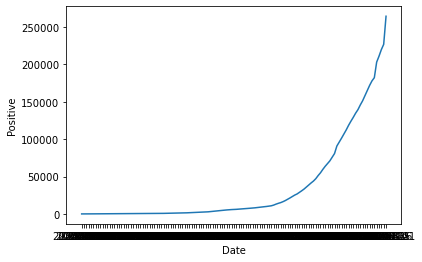

In [4]:
sns.lineplot(x="Date", y="Positive",data=df_Karnataka)    #plot of the original data from the dataset

        Positive
2259         NaN
2260         NaN
2261  161.333333
2262  184.333333
2263  195.000000
2264  206.333333
2265  218.000000
2266  231.333333
2267  246.333333
2268  262.000000


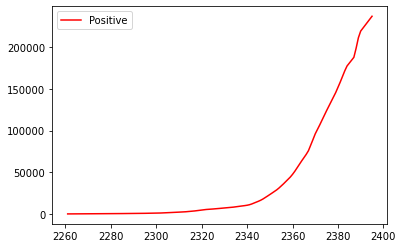

In [5]:
from matplotlib import pyplot                         #considering a window size=3 for predicting using Moving Average
rolling = df_Karnataka.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
rolling_mean.plot(color='red')                        #plot of predicted value is as shown below
pyplot.show()

predicted=177.600000, expected=215.000000
predicted=195.000000, expected=232.000000
predicted=206.400000, expected=247.000000
predicted=219.600000, expected=260.000000
predicted=232.200000, expected=279.000000
predicted=246.600000, expected=315.000000
predicted=266.600000, expected=359.000000
predicted=292.000000, expected=384.000000
predicted=319.400000, expected=390.000000
predicted=345.400000, expected=408.000000
predicted=371.200000, expected=418.000000
predicted=391.800000, expected=427.000000
predicted=405.400000, expected=445.000000
predicted=417.600000, expected=474.000000
predicted=434.400000, expected=500.000000
predicted=452.800000, expected=503.000000
predicted=469.800000, expected=512.000000
predicted=486.800000, expected=523.000000
predicted=502.400000, expected=535.000000
predicted=514.600000, expected=565.000000
predicted=527.600000, expected=589.000000
predicted=544.800000, expected=601.000000
predicted=562.600000, expected=614.000000
predicted=580.800000, expected=651

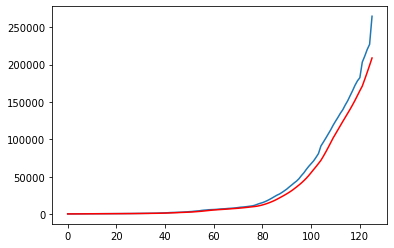

In [6]:
#for window size = 5
#combined plot of original(blue) and predicted values(red)
#Moving Average has a lag

from numpy import mean
from sklearn.metrics import mean_squared_error
X = df_Karnataka['Positive'].values
window = 5
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=151.500000, expected=181.000000
predicted=178.000000, expected=197.000000
predicted=189.000000, expected=207.000000
predicted=202.000000, expected=215.000000
predicted=211.000000, expected=232.000000
predicted=223.500000, expected=247.000000
predicted=239.500000, expected=260.000000
predicted=253.500000, expected=279.000000
predicted=269.500000, expected=315.000000
predicted=297.000000, expected=359.000000
predicted=337.000000, expected=384.000000
predicted=371.500000, expected=390.000000
predicted=387.000000, expected=408.000000
predicted=399.000000, expected=418.000000
predicted=413.000000, expected=427.000000
predicted=422.500000, expected=445.000000
predicted=436.000000, expected=474.000000
predicted=459.500000, expected=500.000000
predicted=487.000000, expected=503.000000
predicted=501.500000, expected=512.000000
predicted=507.500000, expected=523.000000
predicted=517.500000, expected=535.000000
predicted=529.000000, expected=565.000000
predicted=550.000000, expected=589

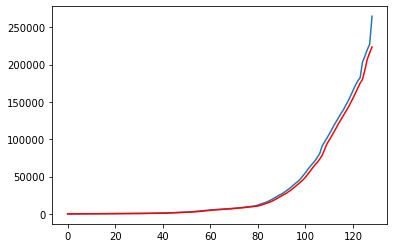

In [7]:
# for window size = 2
# we can see that window=2 is better than window=5 for Moving Average technique
# MA always has a lag, the larger the window the greater the lag
#refer to the plot below

window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

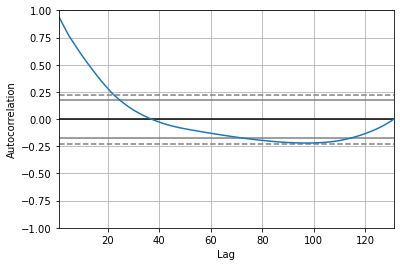

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(X)
pyplot.show()                            #plot of the ACF 

predicted=8663.048853, expected=7530.000000
predicted=9062.756800, expected=7734.000000
predicted=9293.950559, expected=7944.000000
predicted=9536.106746, expected=8281.000000
predicted=9961.284692, expected=8697.000000
predicted=10481.825788, expected=9150.000000
predicted=11034.937412, expected=9399.000000
predicted=11297.809070, expected=9721.000000
predicted=11678.157693, expected=10118.000000
predicted=12170.912263, expected=10560.000000
predicted=12712.034381, expected=11005.000000
predicted=13246.672590, expected=11923.000000
predicted=14426.791867, expected=13190.000000
predicted=16038.869231, expected=14295.000000
predicted=17355.162345, expected=15242.000000
predicted=18442.072665, expected=16514.000000
predicted=20004.171695, expected=18016.000000
predicted=21862.702621, expected=19710.000000
predicted=23935.437275, expected=21549.000000
predicted=26169.384564, expected=23474.000000
predicted=28491.310468, expected=25317.000000
predicted=30680.245317, expected=26815.000000
p

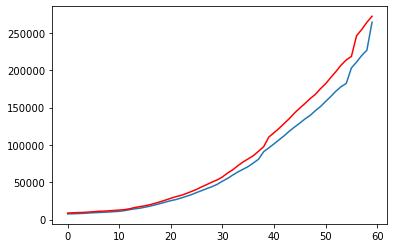

In [29]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

#predicting values using the Autoregression Model

df_Karnataka.dropna(inplace=True)
X=df_Karnataka['Positive'].values
X=np.array(X)
train, test = X[1:len(X)-60], X[len(X)-60:]
#we have taken the last 60 values to test our model the remaining is used to train the model
# train autoregression
window = 3
model = AutoReg(train, lags=5)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot of predicted and original values
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()